In [16]:
'''
Trying out momentum trading signals

only using momentum as a signal. Very risky and not worth trading just based on momentum alone but a learning experience

thesis: Ride the wave when it is rapidly falling up, get off when it is rapidly falling down.
Buy high, sell higher

combine these 3:

1. Rate of change (ROC)
    percentage change of closing prices
    closing prices with significant difference between timestamps

2. stochastic ocillator

3. relative strength index (RSI)

4. Moving Average Convergence Divergence (MACD)
'''

# import
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [22]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        # Download the data and extract 'Adj Close' specifically
        df = yf.download(i, start=datetime(2024, 3, 10), end=datetime(2025, 11, 13))
        print(df)
        data = pd.concat([data, df['Close']], axis=1)
        names.append(i)
    data.columns = names
    return data

ticks = ["GME", "AMC"] 
data = get_historical_Data(ticks)
print(data.shape)
# Most Recent Data
print(data.tail())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close   High        Low       Open   Volume
Ticker            GME    GME        GME        GME      GME
Date                                                       
2024-03-11  14.430000  14.94  14.360000  14.640000  2111900
2024-03-12  14.720000  14.84  14.090000  14.350000  2382600
2024-03-13  14.870000  15.20  14.620000  14.690000  2898100
2024-03-14  14.630000  15.02  14.400000  14.800000  2534200
2024-03-15  14.240000  14.83  14.210000  14.550000  4476500
...               ...    ...        ...        ...      ...
2025-03-06  24.200001  25.01  24.049999  24.740000  3421400
2025-03-07  24.000000  24.35  23.520000  24.000000  3464000
2025-03-10  22.420000  23.58  22.260000  23.440001  6226900
2025-03-11  22.610001  22.98  22.080000  22.350000  4226900
2025-03-12  22.080000  23.23  22.059999  22.945000  2974020

[252 rows x 5 columns]
Price       Close  High   Low  Open    Volume
Ticker        AMC   AMC   AMC   AMC       AMC
Date                                        

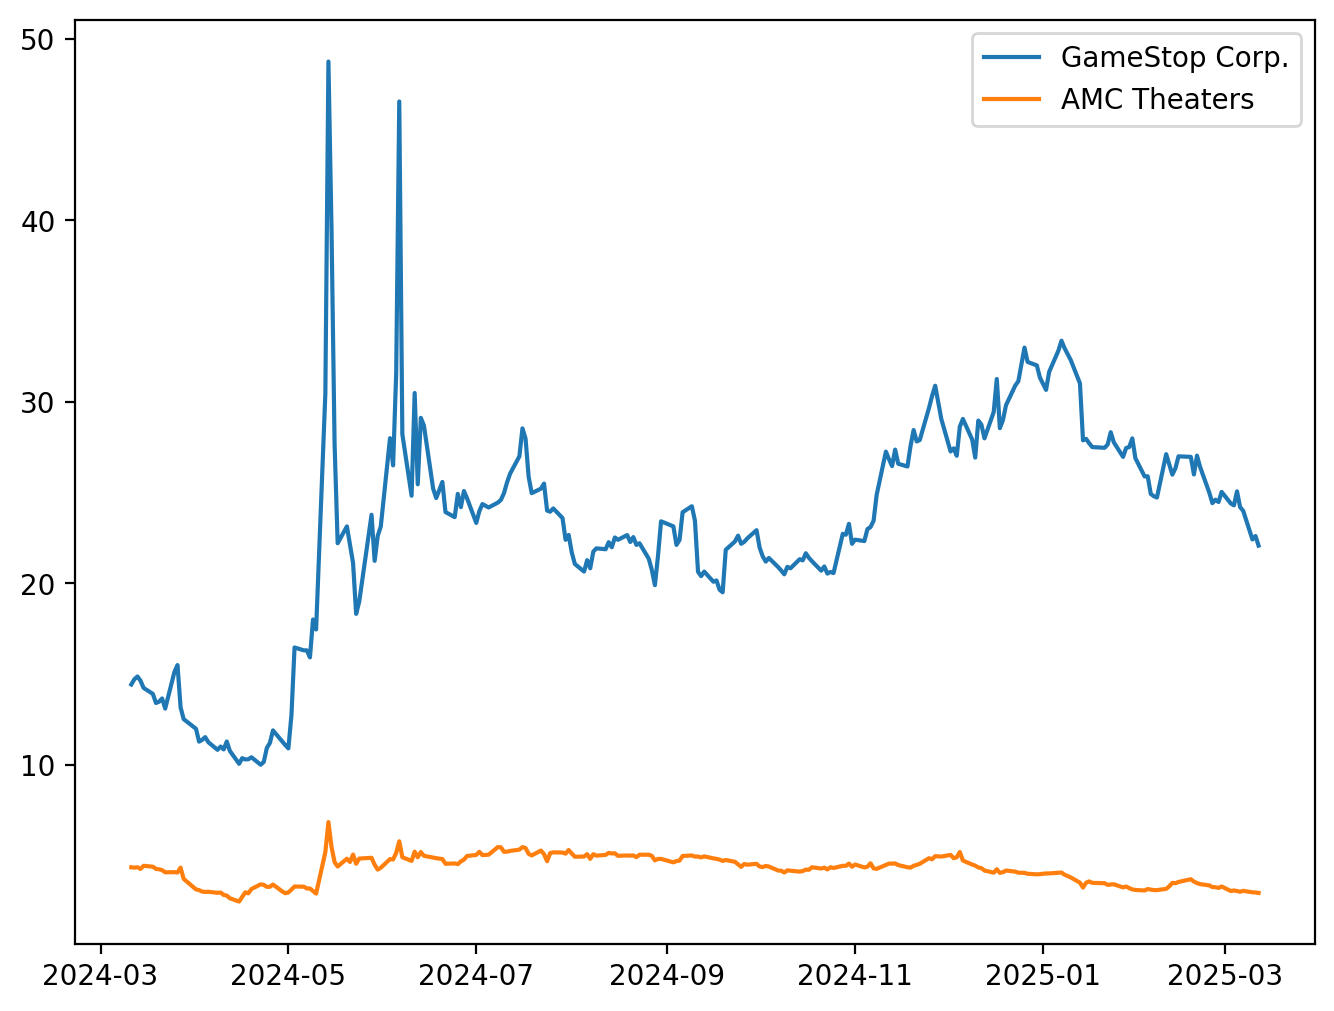

In [23]:
# What do these meme stocks look like?
GME = data['GME']
AMC = data['AMC']
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(GME, label = 'GameStop Corp.')
plt.plot(AMC, label = 'AMC Theaters')

plt.legend()

In [24]:
'''
Rate of change (ROC)

high rate of change --> indicator to buy
low rate of change --> indicator to sell
'''

d = data.pct_change()[1:] # converts to get percentage changes
GME = d['GME']
GME.values, GME.mean()

(array([ 2.00970170e-02,  1.01901913e-02, -1.61398637e-02, -2.66575762e-02,
        -2.31741523e-02, -3.59453634e-02,  5.21996239e-03,  1.33531388e-02,
        -4.09955690e-02,  1.54198431e-01,  2.51322829e-02, -1.50322576e-01,
        -4.93545645e-02, -4.23323217e-02, -5.92160177e-02,  8.86528226e-03,
         1.31809857e-02, -2.42844527e-02, -3.73333401e-02,  1.66205269e-02,
        -1.45322293e-02,  4.05529553e-02, -4.60584150e-02, -6.59238633e-02,
         3.08150550e-02, -6.75021173e-03,  9.70895990e-04,  1.06692194e-02,
        -3.93473939e-02,  1.49849765e-02,  7.57874478e-02,  2.56175412e-02,
         6.15521479e-02, -5.12604770e-02, -1.77147750e-02, -1.62308659e-02,
         1.69569240e-01,  2.90752274e-01, -9.71462381e-03,  0.00000000e+00,
        -2.39116740e-02,  1.31281416e-01, -3.05386528e-02,  7.43986389e-01,
         6.00985182e-01, -1.88717964e-01, -3.00379251e-01, -1.97325659e-01,
         4.18730456e-02, -4.40794545e-02, -4.52079549e-02, -1.32575806e-01,
         3.7

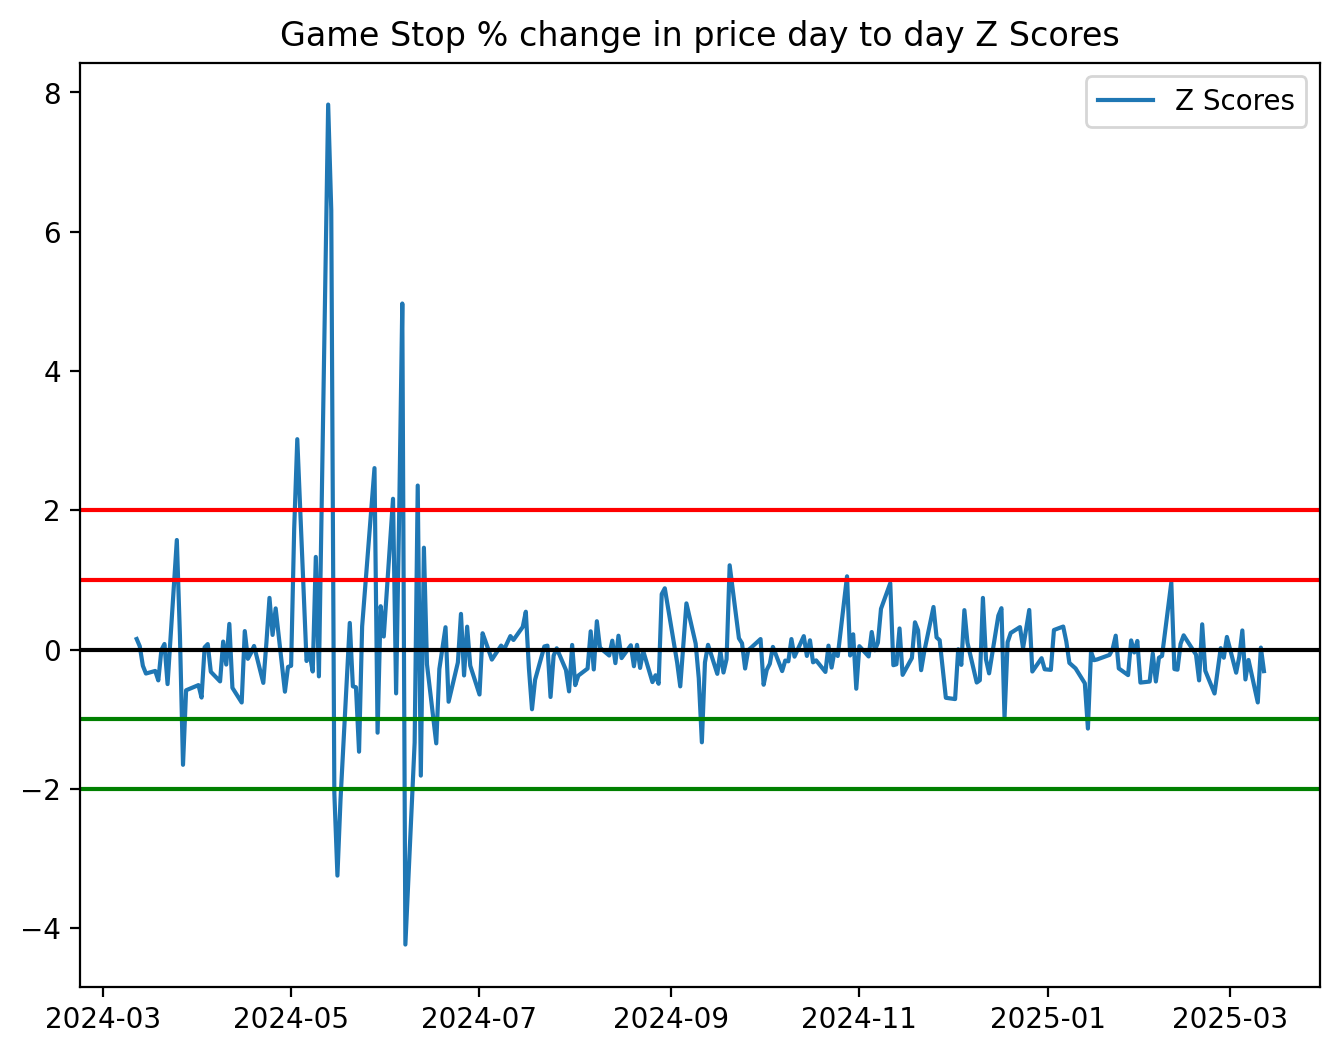

In [25]:
plt.figure(figsize=(8, 6), dpi=200)
# calculate Zscore of each row (observed value - mean)/standard deviation

df_zscore = (GME - GME.mean())/GME.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(2.0, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-2.0, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Game Stop % change in price day to day Z Scores')
plt.show()

In [26]:
'''
We could see that you can use Z-score to try to predict when these crazy events will occur
(like when it jumps far from the first or second band)

how can we see when a spike COULD occur?

Momentum is defined as latest price - closing price(x number of days ago)
'''

data

,GME,AMC
Date,,
2024-03-11,14.430000,4.360
2024-03-12,14.720000,4.340
2024-03-13,14.870000,4.360
2024-03-14,14.630000,4.270
2024-03-15,14.240000,4.440
...,...,...
2025-03-06,24.200001,3.010
2025-03-07,24.000000,3.060
2025-03-10,22.420000,2.980


In [27]:
'''
Measure momentum by subtracting current day + head - current day final price

we just use diff() ez pz
'''
data_mi = data.diff(10) # 10 is num of days ahead you use as final price
data_mi

,GME,AMC
Date,,
2024-03-11,NaN,NaN
2024-03-12,NaN,NaN
2024-03-13,NaN,NaN
2024-03-14,NaN,NaN
2024-03-15,NaN,NaN
...,...,...
2025-03-06,-2.840000,-0.480
2025-03-07,-2.420000,-0.370
2025-03-10,-2.580000,-0.380


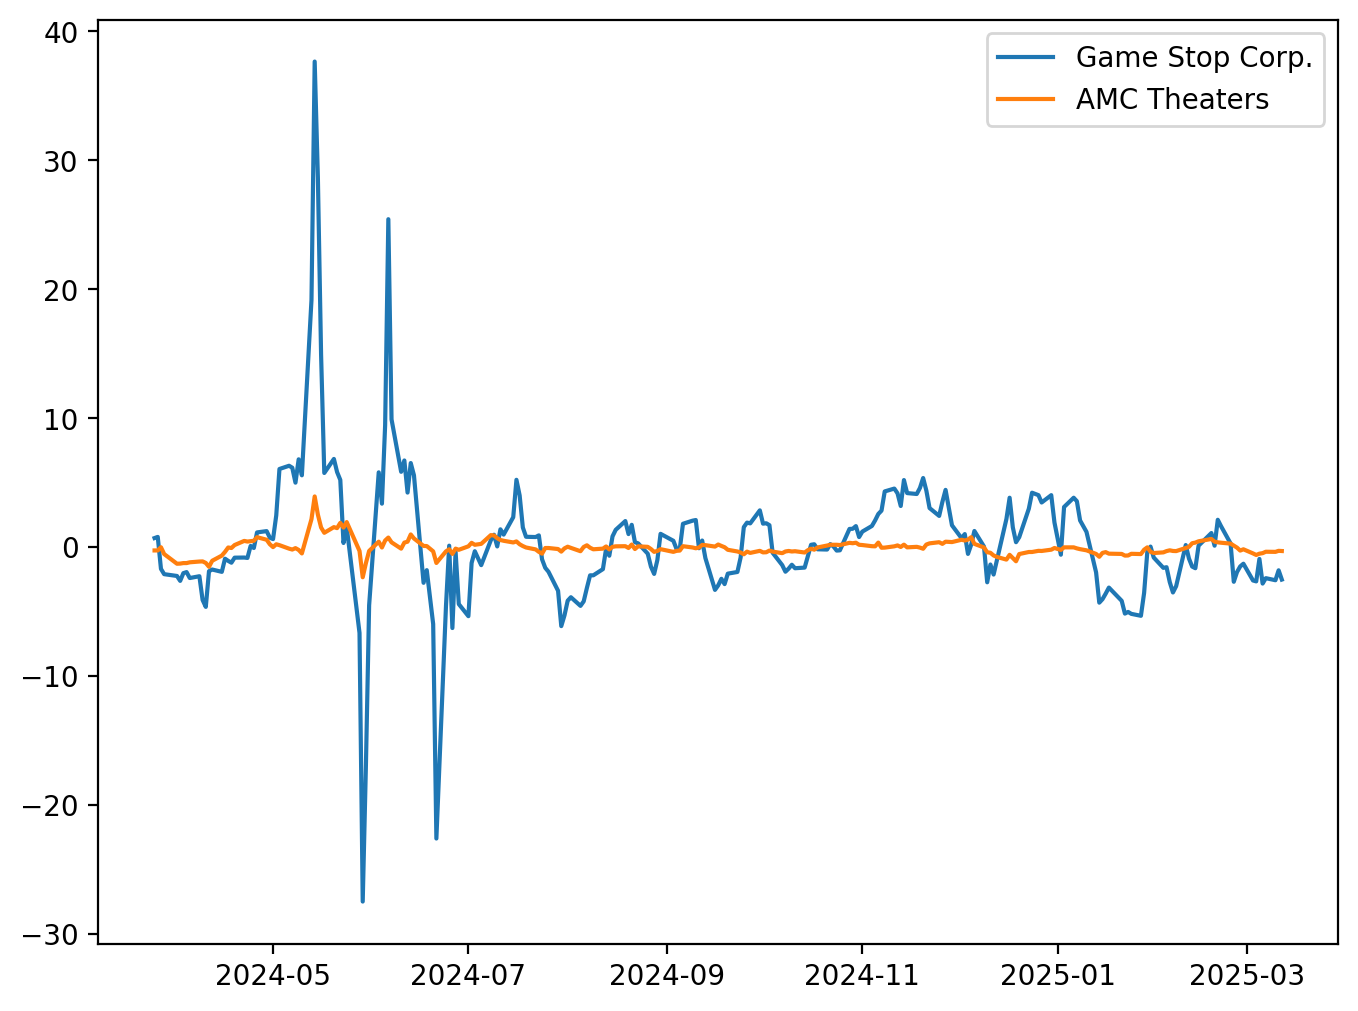

In [28]:
# plot individual features and see how they interact

figure(figsize=(8, 6), dpi=200)
GME = data_mi['GME']
AMC = data_mi['AMC']

plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.legend()